## Boston Housing Dataframe.

#### _The following describes the dataset variables:_

  -  CRIM - per capita crime rate by town
  -  ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
  -  INDUS - proportion of non-retail business acres per town.
  -  CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
  -  NOX - nitric oxides concentration (parts per 10 million)
  -  RM - average number of rooms per dwelling
  -  AGE - proportion of owner-occupied units built prior to 1940
  -  DIS - weighted distances to five Boston employment centres
  -  RAD - index of accessibility to radial highways
  -  TAX - full-value property-tax rate per 10000 USD
  -  PTRATIO - pupil-teacher ratio by town
  -  LSTAT - % lower status of the population
  -  MEDV - Median value of owner-occupied homes in 1000's USD



<hr style="background-color: red; height: 2px;">

##### Importng needed libraries

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import statsmodels.api as sm



#### load the Boston housing dataset in the notebook

In [10]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
df=pd.read_csv(boston_url)
pd.set_option("display.max.columns", None)
df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


<hr style="background-color: red; height: 2px;">

**QUESTION 1:** For the "Median value of owner-occupied homes" provide a boxplot

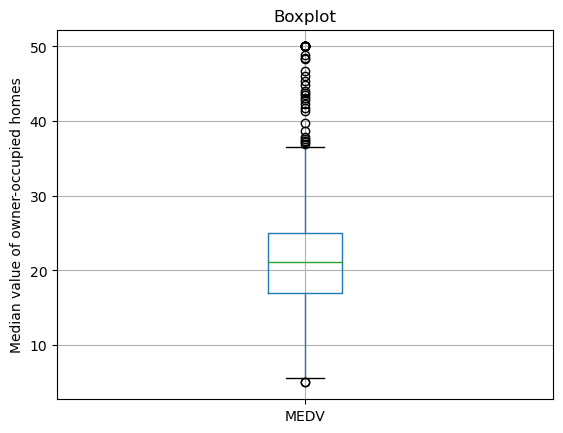

In [11]:
pd.plotting.boxplot(df, column=['MEDV'])
plt.ylabel("Median value of owner-occupied homes")
plt.title("Boxplot")
plt.show()

**QUESION 1 ANSWER**: The median value of Owner-occupied homes is around $20000.

<hr style="background-color: red; height: 2px;">


**QUESTION 2**. Provide a  bar plot for the Charles river variable


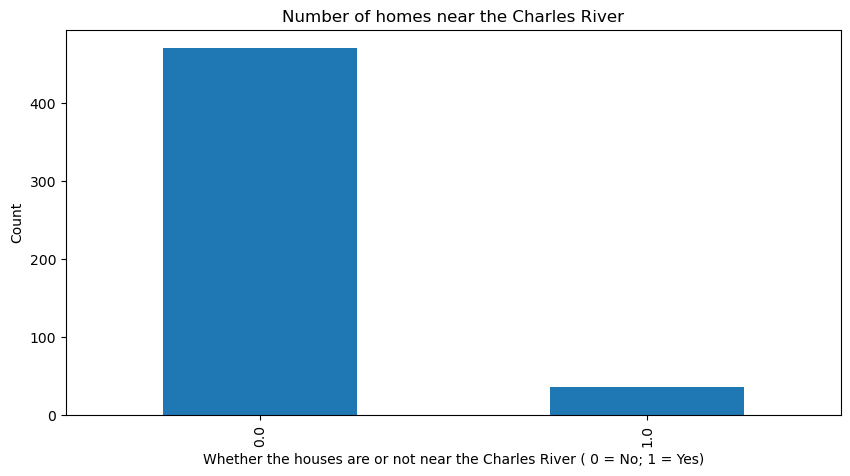

In [30]:
X = ["CHAS"]
Y = list(df.iloc[5])
  
# Plot the data using bar() method
b =  df['CHAS'].value_counts().plot(kind='bar')
b.set_xlabel("Whether the houses are or not near the Charles River ( 0 = No; 1 = Yes)") 
b.set_ylabel("Count")
b.set_title("Number of homes near the Charles River")
plt.show(b)

**QUESION 2 ANSWER**: The majority of the houses are not near the Charles River

<hr style="background-color: red; height: 2px;">

**QUESION 3** Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

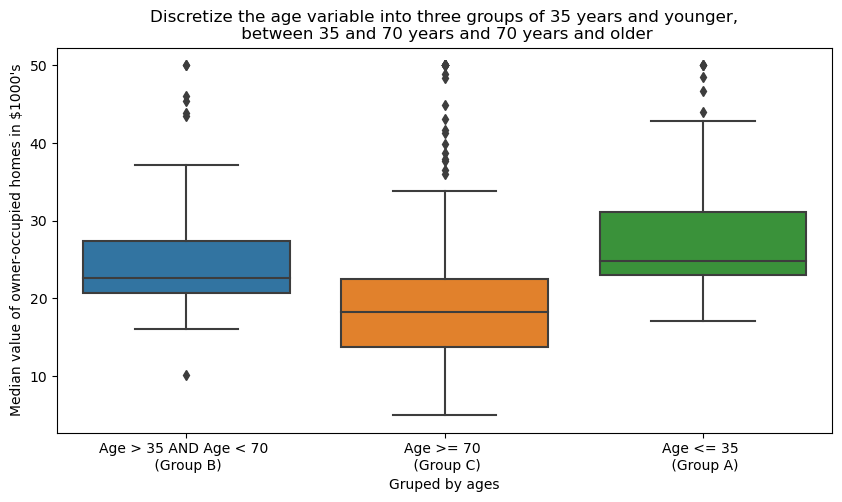

In [31]:
df.loc[(df["AGE"] <= 35), 'age'] = 'Age <= 35 \n (Group A)'
df.loc[(df["AGE"] > 35) & (df["AGE"] < 70), 'age'] = 'Age > 35 AND Age < 70 \n (Group B)'
df.loc[(df["AGE"] >= 70), 'age'] = 'Age >= 70 \n (Group C)'

ax = sns.boxplot(x='age', y='MEDV', data=df)
plt.title("Discretize the age variable into three groups of 35 years and younger,\n between 35 and 70 years and 70 years and older")
plt.ylabel("Median value of owner-occupied homes in $1000's");
plt.xlabel("Gruped by ages");
plt.rcParams['figure.figsize'] = [10, 5]
plt.show()

**QUESION 3 ANSWER**  The Age group A is the highest and for house owners of the Age group C is the lowest.

<hr style="background-color: red; height: 2px;">

**QUESION 4**  Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

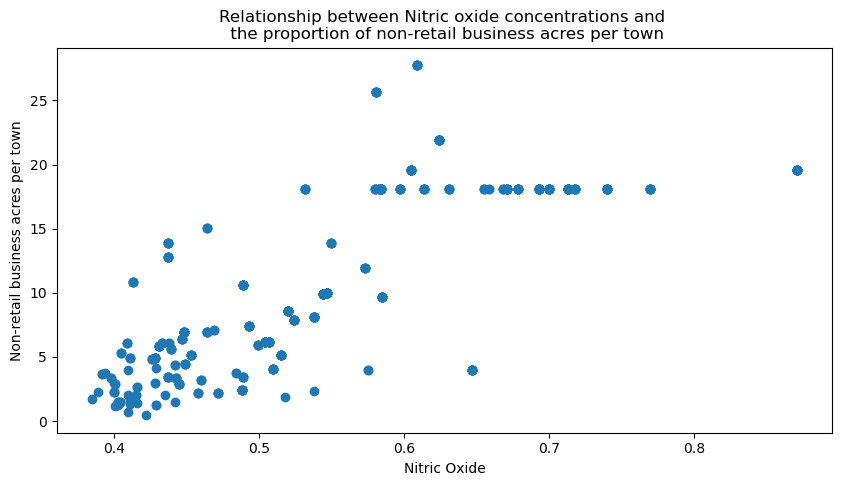

In [27]:
plt.scatter(df['NOX'], df['INDUS'])
plt.ylabel("Non-retail business acres per town")
plt.xlabel("Nitric Oxide")
plt.title("Relationship between Nitric oxide concentrations and \n the proportion of non-retail business acres per town")
plt.show()




**QUESION 4 ANSWER**  There is a strong positive correlation between Nitric Oxide Concentrations and Proportion of Non-Retail Business Acres per Town.

<hr style="background-color: red; height: 2px;">

**QUESTION 5** Create a histogram for the pupil to teacher ratio variable

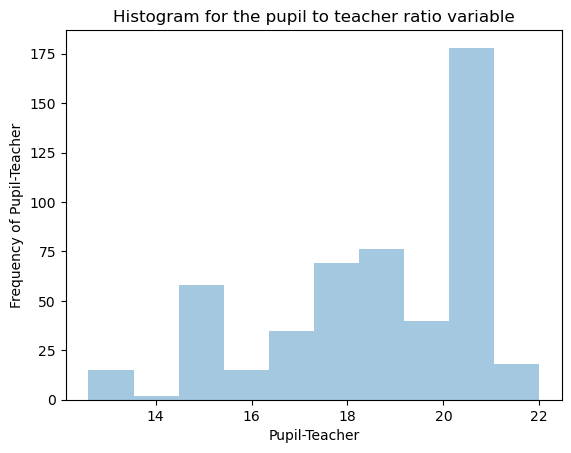

In [36]:
h = sns.distplot(df["PTRATIO"], kde=False, bins=10)
h.set(xlabel = "Pupil-Teacher", ylabel = "Frequency of Pupil-Teacher", title = "Histogram for the pupil to teacher ratio variable")
plt.show(h)

**QUESTION 5 ANSWER** Pupil to teacher ratio is NOT distrubuted  normally according to the histogram

<hr style="background-color: red; height: 2px;">

#### Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

In [43]:
diff = scipy.stats.ttest_ind(df[df['CHAS'] == 1]['MEDV'],df[df['CHAS']== 0]['MEDV'], equal_var = True)
print(diff)
#Rejected null hypothesis, p-value < 0.05

Ttest_indResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05)


#### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

In [54]:
df.loc[(df["AGE"] > 82), 'age'] = '< 1940'
df.loc[(df["AGE"] <= 82), 'age'] = '> 1940'

scipy.stats.levene(df[df.age =='< 1940']['MEDV'],
                  df[df.age =='> 1940']['MEDV'],
                  center='mean')


LeveneResult(statistic=1.581350317246268, pvalue=0.2091486621949195)

In [56]:
#There is a statistical difference in Median values of houses MEDV for each proportion of owner occupied units built
#prior to 1940, because p-value is greater than 0.05

#### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

In [45]:
scipy.stats.pearsonr( df['INDUS'],  df['NOX'])

(0.7636514469209151, 7.913361061238693e-98)

#### What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [51]:
from statsmodels.formula.api import ols
x =  df['DIS']
y =  df['MEDV']
x = sm.add_constant(x)
m = sm.OLS(y,x).fit()
p = m.predict(x)
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sun, 23 Jul 2023   Prob (F-statistic):           1.21e-08
Time:                        02:49:09   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Comment** => Null,  There is no correlation between weighted distance to the five Boston employment centres and the median value of owner occupied homes.